In [3]:
data = []

with open("output.csv") as icm_data:
    for line in icm_data.readlines()[1:]:
        try:
            time, rx, ry, rz, ax, ay, az = [float(x) for x in line.split(", ")]
            data.append({"time": time, "rot": {"x": rx, "y": ry, "z": rz}, "acc": {"x": ax, "y": ay, "z": az}})
        except:
            pass

start = data[0]["time"]
for i in range(len(data)):
    data[i]["time"] -= start

In [4]:
from math import atan2, pi

def pitch_from_accel(acc):
    return 180 * atan2(acc["z"], acc["x"]) / pi

def roll_from_accel(acc):
    return 180 * atan2(acc["z"], acc["y"]) / pi

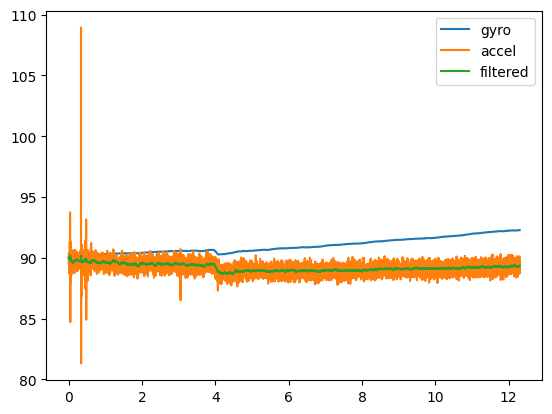

In [12]:
import matplotlib.pyplot as plt

times = [x["time"] for x in data]

gyro = []
accel = []
filtered_gyro = []

last_time = 0
pitch_orientation = 90
filtered_pitch_orientation = 90
for d in data:
    dt = d["time"] - last_time
    last_time = d["time"]
    pitch_orientation += d["rot"]["x"] * dt
    gyro.append(pitch_orientation)
    accel.append(pitch_from_accel(d["acc"]))

    nfpto = filtered_pitch_orientation + d["rot"]["x"] * dt
    filtered_pitch_orientation = 0.98 * nfpto + 0.02 * pitch_from_accel(d["acc"])
    filtered_gyro.append(filtered_pitch_orientation)

plt.plot(times, gyro, label="gyro")
plt.plot(times, accel, label="accel")
plt.plot(times, filtered_gyro, label="filtered")
plt.legend()
plt.show()